# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.



In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('previsao_de_renda.csv')
df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [66]:
# Organizing useful data columns:
df1 = df.copy()
colunas = ['Unnamed: 0', 'index', 'mau']
df1 = df1.drop(columns=colunas)

# Selecting only numeric columns:
df1_num = df1.select_dtypes(include=[np.number])

# Calculating the correlation:
correlation_matrix = df1_num.corr()
correlation_matrix

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


C:\Users\Guilherme Rhein\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


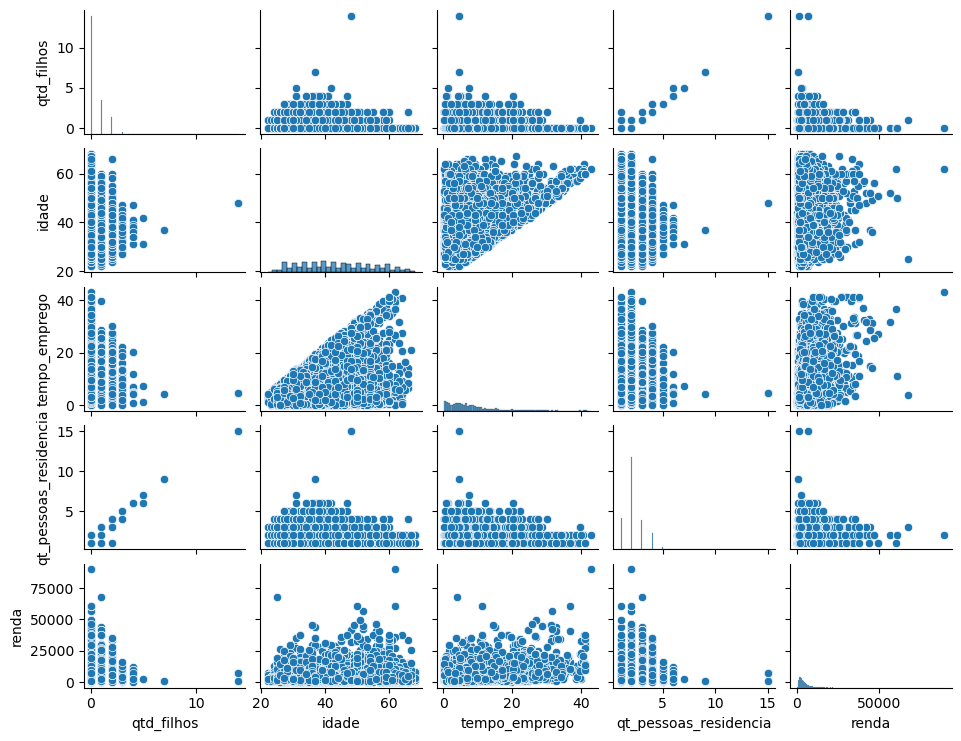

In [49]:
# Scatterplot Matrix:
sns.pairplot(df1_num, height=1.5, aspect=1.3)

plt.show()

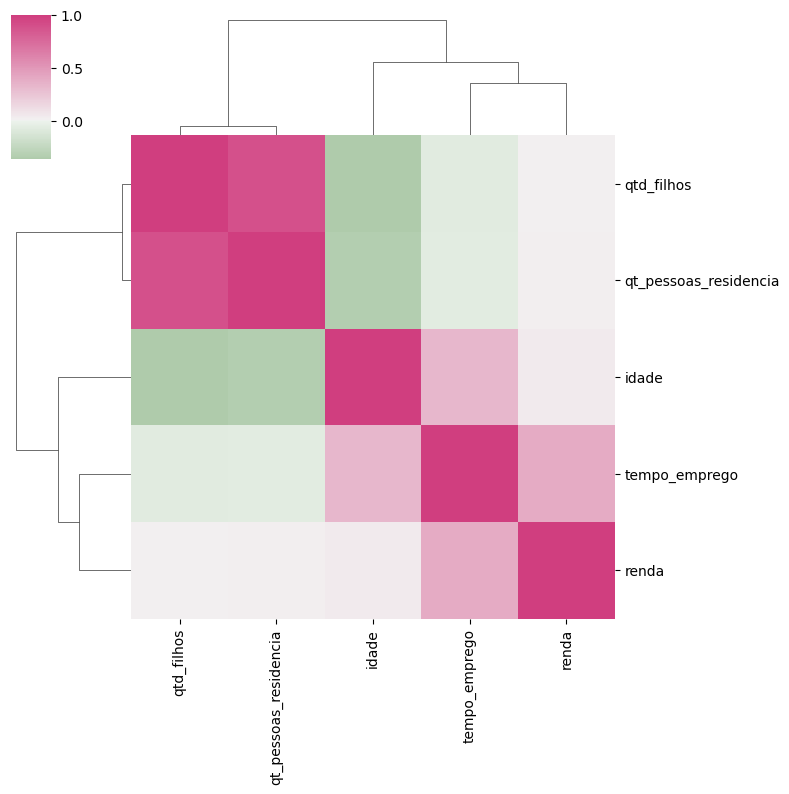

In [110]:
# Clustermap:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 1, center = 'light')

sns.clustermap(correlation_matrix, figsize=(8, 8), center = 0, cmap=cmap)

Nota-se que temos as melhores dados entre :
- 1-) "qtd_filhos" X "qt_pessoas_residencia";
- 2-) "renda" X "tempo_emprego";
- 3-) "idade" X "tempo_emprego";

It is noted that we have the best data between:

- 1-) "qtd_filhos" X "qt_pessoas_residencia";
- 2-) "income" X "time_employment";
- 3-) "age" X "time_employment";


2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

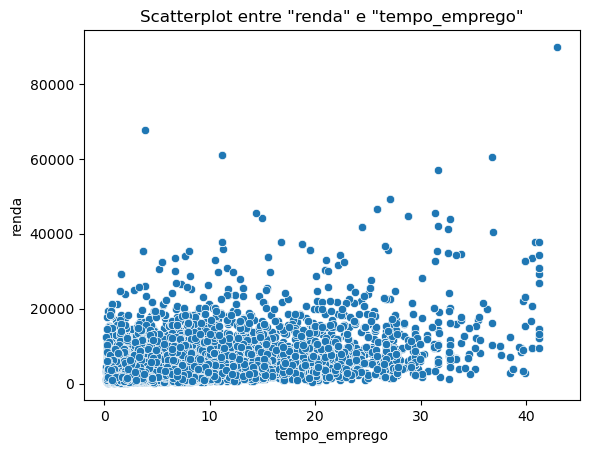

In [163]:
sns.scatterplot(data=df1_num, x='tempo_emprego', y='renda')
plt.title(f'Scatterplot entre "renda" e "tempo_emprego"')
plt.show()

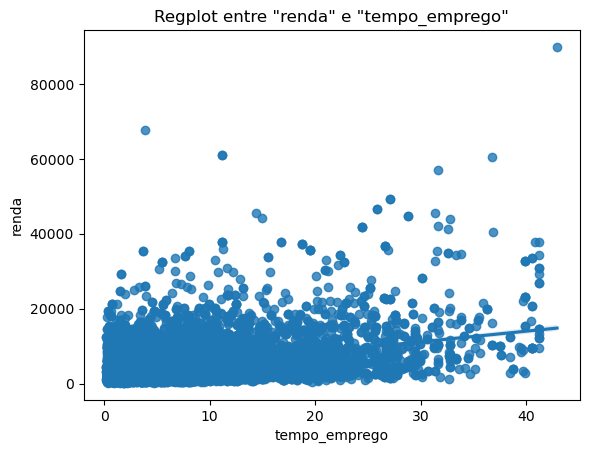

In [217]:
sns.regplot(data=df1_num, x='tempo_emprego', y='renda')
plt.title(f'Regplot entre "renda" e "tempo_emprego"')
plt.show()

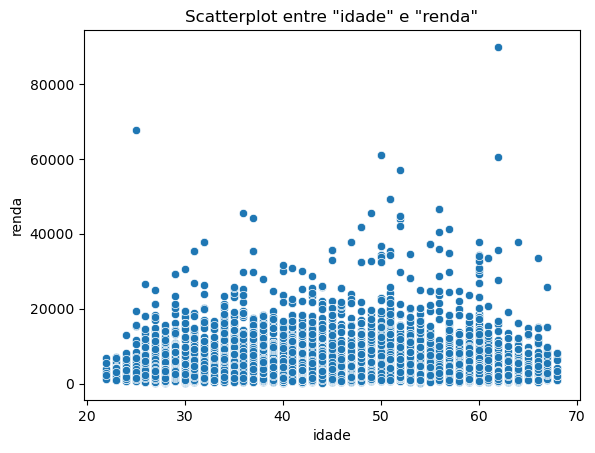

In [127]:
sns.scatterplot(data=df1_num, x='idade', y='renda')
plt.title(f'Scatterplot entre "idade" e "renda"')
plt.show()

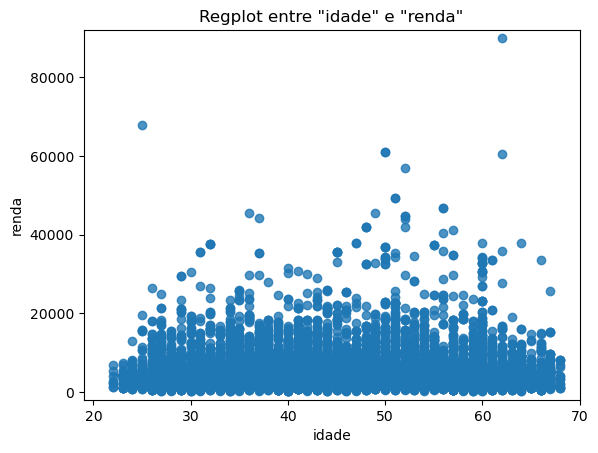

In [215]:
sns.regplot(data=df1_num, x='idade', y='renda')

plt.ylim(-2000, 92000)
plt.xlim(19, 70)

plt.title(f'Regplot entre "idade" e "renda"')
plt.show()

3) Na sua opinião, há outliers na variável renda?

Sem dúvidas é notório a existência de outliers.
Without a doubt, the existence of outliers is notable.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

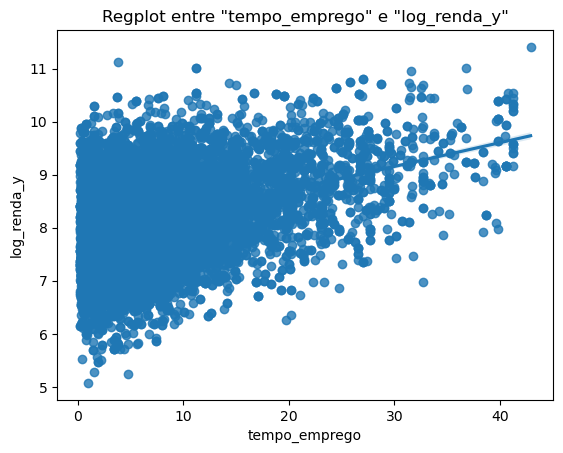

In [225]:
df1_log = df1_num.copy()
df1_log['log_renda_y'] = np.log(df1_log['renda'])

sns.regplot(x='tempo_emprego', y='log_renda_y', data = df1_log)
plt.title(f'Regplot entre "tempo_emprego" e "log_renda_y"')
plt.show()

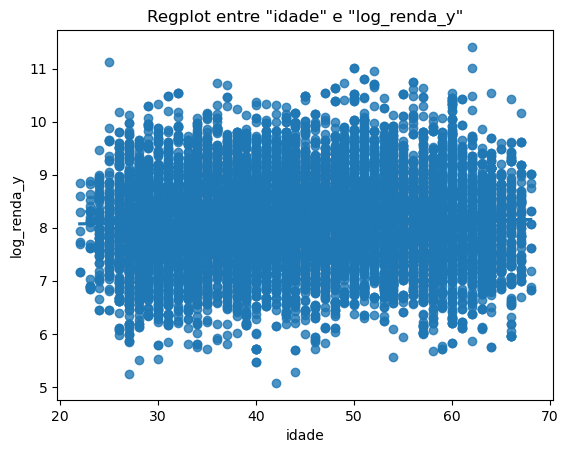

In [226]:
sns.regplot(x='idade', y='log_renda_y', data = df1_log)
plt.title(f'Regplot entre "idade" e "log_renda_y"')
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

A escala logaritimica consegue melhorar a dispersão.
The logarithmic scale can improve dispersion.

In [227]:
df1_log.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda_y
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567,0.023743
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570,0.024712
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235,0.379556
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977,0.036267
renda,0.009567,0.042570,0.394235,0.020977,1.000000,0.835734
log_renda_y,0.023743,0.024712,0.379556,0.036267,0.835734,1.000000
